torch.Size([60, 1, 1000, 480])


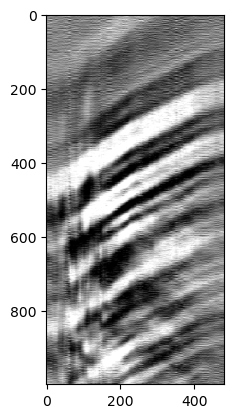

torch.Size([60, 1, 1024, 1024])


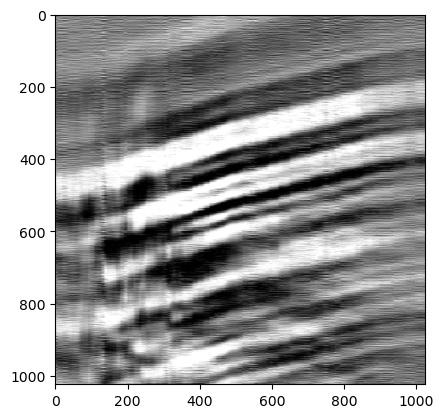

In [13]:
import torch
import easydict
from dataloader import make_dataloader
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
args = easydict.EasyDict({
        'num_epochs':100,
        'num_epochs_ae':100,
        'lr':1e-3,
        'lr_ae':1e-3,
        'weight_decay':5e-7,
        'weight_decay_ae':5e-3,
        'lr_milestones':[50],
        'batch_size':1024,
        'pretrain':True,
        'path':'./0913/',
        'net_name':1024,
        'num_filter':32,
        'latent_dim':100
                })

def make_dataloader_test(data_dir, args, shuffle):
    data_transform = transforms.Compose([transforms.Grayscale(), transforms.ToTensor(), transforms.Resize((1024,1024))])# resize 제거
    dataset = datasets.ImageFolder(data_dir, transform=data_transform)
    # test_num = len(dataset) - train_num
    # train, test = random_split(dataset, [train_num, test_num])
    # train = datasets.ImageFolder(data_dir, transform=data_transform)
    # test = 
    num_workers = 8
    dataloader = DataLoader(dataset, batch_size=args.batch_size, num_workers=num_workers, shuffle=shuffle)
    # train_dataloader = DataLoader(train, batch_size=args.batch_size, num_workers=num_workers, shuffle=True)
    # test_dataloader = DataLoader(test, batch_size=args.batch_size, num_workers=num_workers)
    # return train_dataloader, test_dataloader
    return dataloader


aa = 12


if __name__ == '__main__':
    # Train/Test Loader 불러오기
    dataloader_train = make_dataloader(data_dir='../tdms2img/image_1000_noclip/', args=args, shuffle=False)

    for x, _ in dataloader_train:
        x = x.float().to(device)
        print(x.shape)
    x = x.detach().cpu().numpy()
    plt.imshow(x[aa,0,:,:], cmap='gray')
    plt.show()

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

if __name__ == '__main__':
    # Train/Test Loader 불러오기
    dataloader_train = make_dataloader_test(data_dir='../tdms2img/image_1000_noclip/', args=args, shuffle=False)

    for x, _ in dataloader_train:
        x = x.float().to(device)
        print(x.shape)
    x = x.detach().cpu().numpy()
    plt.imshow(x[aa,0,:,:], cmap='gray')
    plt.show()